In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a futur

In [6]:
tf.random.set_random_seed(42)

In [7]:
hand = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [9]:
(X_train, y_train), (X_test, y_test) = hand

In [10]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

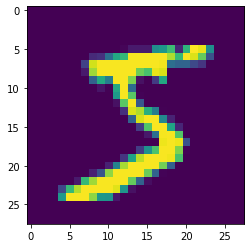

In [14]:
plt.imshow(X_train[0])

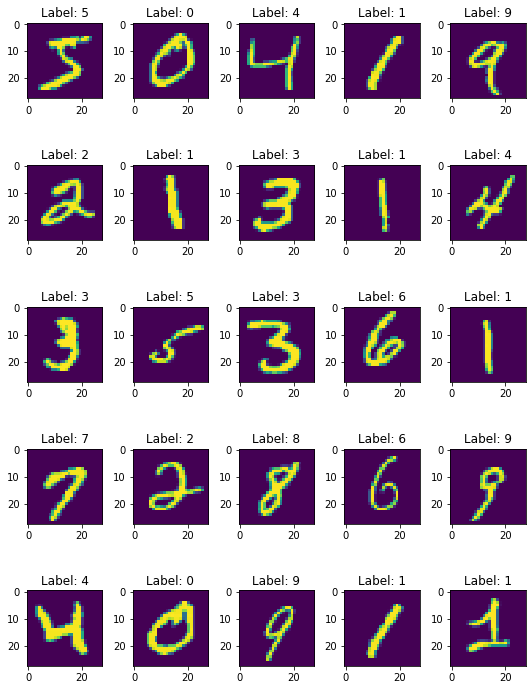

In [15]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [16]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
X_train /= 255
X_test /= 255

In [19]:
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [20]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [22]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1996 - accuracy: 0.9402
Epoch 2/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0836 - accuracy: 0.9750
Epoch 3/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0642 - accuracy: 0.9805
Epoch 4/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0538 - accuracy: 0.9836
Epoch 5/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0461 - accuracy: 0.9860
Epoch 6/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0414 - accuracy: 0.9871
Epoch 7/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 8/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 9/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0285 - accuracy: 0.990

In [24]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

In [25]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[1.63802497e-13, 2.57091098e-10, 5.56600377e-10, 4.92172525e-10,
        4.14775202e-13, 9.34741921e-14, 1.51477006e-16, 1.00000000e+00,
        1.23811519e-12, 1.41258658e-08],
       [3.15618950e-13, 1.15083124e-10, 1.00000000e+00, 2.72546827e-14,
        1.20782152e-18, 4.96633398e-19, 2.33172477e-13, 1.26393515e-15,
        5.12563523e-15, 5.07764819e-21],
       [3.30439723e-13, 9.99999642e-01, 7.40151673e-09, 2.15356135e-13,
        1.04559650e-08, 1.33695180e-10, 7.62657881e-10, 3.24660050e-07,
        5.73625925e-10, 2.20324772e-10],
       [9.99994159e-01, 1.54085175e-10, 1.36409883e-10, 2.16797223e-11,
        4.02638339e-10, 4.18657470e-11, 5.87967861e-06, 2.08890794e-10,
        1.04179787e-09, 4.38757208e-09]], dtype=float32)

In [26]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

array([1., 1., 1., 1.], dtype=float32)

In [27]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [28]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

[[ 976    0    1    0    0    0    2    1    0    0]
 [   0 1133    0    0    0    1    0    0    1    0]
 [   1    0 1027    1    0    0    0    3    0    0]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    0    0  977    0    1    0    2    2]
 [   0    0    0    5    0  886    1    0    0    0]
 [   2    2    0    0    1    2  951    0    0    0]
 [   0    2    5    0    1    0    0 1016    1    3]
 [   1    0    2    1    1    0    1    1  964    3]
 [   1    1    0    0    4    1    0    1    1 1000]]


# Testing Handwritten digits

In [29]:
path = r'E:/Data Sets'
path

'E:/Data Sets'

In [203]:
labels = ['zero','one','two','three','four','five','six','seven','eight','nine']
pred = []

for lab in labels:

    img = Image.open(os.path.join(path, f'{lab}.png')) #<--FILL IN THIS VALUE!
    img = img.convert('L')

    newsize = (28,28)
    img2 = img.resize(newsize)

    testimg = asarray(img2)
    testimg = testimg / 255.0
    testimg = testimg.reshape(1, 28, 28, 1)
    # predict the class
    predict_value = model.predict(testimg)
    digit = argmax(predict_value)
    pred.append(digit)                 
    #print(digit)

In [206]:
for i in range(len(labels)):
    print("True value :" + str(i) + " Predicted value :" + str(pred[i]))

True value :0 Predicted value :0
True value :1 Predicted value :2
True value :2 Predicted value :2
True value :3 Predicted value :3
True value :4 Predicted value :5
True value :5 Predicted value :5
True value :6 Predicted value :6
True value :7 Predicted value :1
True value :8 Predicted value :8
True value :9 Predicted value :8


In [209]:
img = Image.open(os.path.join(path, 'B.png')) 
img = img.convert('L')

newsize = (28,28)
img2 = img.resize(newsize)

testimg = asarray(img2)
testimg = testimg / 255.0
testimg = testimg.reshape(1, 28, 28, 1)
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)

In [212]:
print(digit)

8
